# Fine-Tuning Gemma 2 for Uzbek Language

## Project Description

This project aims to fine-tune the Gemma 2 language model with data in the Uzbek language. The objective is to enhance the model's fluency and contextual understanding of Uzbek, making it a more reliable and effective tool for tasks involving this language.

## Dependencies

*To execute the steps in this project, you will need the following dependencies installed:*

- Python 3.8 or later
- TensorFlow 2.9 or later
- Keras NLP
- Datasets library
- IPython for interactive Python environments
- Matplotlib for visualization


This section outlines the setup process for installing and configuring Keras, focusing on using the JAX backend to optimize memory usage and enable advanced training configurations for fine-tuning the Gemma 2 model.

In [1]:
# Install Keras 3 last. See https://keras.io/getting_started/ for more details.
!pip install -q -U keras-nlp datasets
!pip install -q -U keras

import os

# Set the backbend before importing Keras
os.environ["KERAS_BACKEND"] = "jax"
# Avoid memory fragmentation on JAX backend.
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "1.00"

import keras_nlp
import keras

# Run at half precision.
#keras.config.set_floatx("bfloat16")

# Training Configurations
token_limit = 512
num_data_limit = 100
lora_name = "uzbek_gemma_5"
lora_rank = 4
lr_value = 1e-4
train_epoch = 20
model_id = "gemma2_instruct_2b_en"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.4 MB/s eta 0:00:00


This section describes how to set up the Gemma 2 language model for text generation tasks, including loading the model, generating outputs based on user prompts, and measuring inference time to evaluate performance before fine-tuning.

In [2]:
import keras
import keras_nlp

import time

gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset(model_id)
gemma_lm.summary()

tick_start = 0

def tick():
    global tick_start
    tick_start = time.time()

def tock():
    print(f"TOTAL TIME ELAPSED: {time.time() - tick_start:.2f}s")

def text_gen(prompt):
    tick()
    input = f"<start_of_turn>user\n{prompt}<end_of_turn>\n<start_of_turn>model\n"
    output = gemma_lm.generate(input, max_length=token_limit)
    print("\nGemma output:")
    print(output)
    tock()

# inference before fine-tuning
text_gen(""" Matnni xulosala: Ma’lum qilinishicha, ijtimoy tarmoqlarda kulvor ilonni tiriklay yegan fuqaro haqida video tarqalgandi. Jizzax viloyati Ekologiya boshqarmasi Zomin tumani bo‘limi va IIB xodimlari hamkorligida bu borada o‘rganish ishlari olib borildi va holat fuqaro Q.H. tomonidan sodir etilgani aniqlandi.
Fuqaro bu harakati bilan “Hayvonot dunyosini muhofaza qilish va undan foydalanish to‘g‘risida”gi qonunning 4, 30, 51, 53-moddalari talablarini buzgan.
Davlat inspektorlari tomonidan unga nisbatan Ma’muriy javobgarlik to‘g‘risidagi kodeksning 90-moddasi (ov qilish va baliq ovlash qoidalarini, shuningdek hayvonot dunyosidan foydalanishning boshqa turlarini amalga oshirish qoidalarini buzish) 1-qismi bilan BHMning 20 baravari (7,5 million so‘m) miqdorida jarima qo‘llanildi.""")


Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                              │                      Vocab size: 256,000 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2304)        │   2,614,341,888 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     589,824,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,614,341,888 (9.74 GB)

 Trainable params: 2,614,341,888 (9.74 GB)

 Non-trainable params: 0 (0.00 B)


Gemma output:
<start_of_turn>user
 Matnni xulosala: Ma’lum qilinishicha, ijtimoy tarmoqlarda kulvor ilonni tiriklay yegan fuqaro haqida video tarqalgandi. Jizzax viloyati Ekologiya boshqarmasi Zomin tumani bo‘limi va IIB xodimlari hamkorligida bu borada o‘rganish ishlari olib borildi va holat fuqaro Q.H. tomonidan sodir etilgani aniqlandi.
Fuqaro bu harakati bilan “Hayvonot dunyosini muhofaza qilish va undan foydalanish to‘g‘risida”gi qonunning 4, 30, 51, 53-moddalari talablarini buzgan.
Davlat inspektorlari tomonidan unga nisbatan Ma’muriy javobgarlik to‘g‘risidagi kodeksning 90-moddasi (ov qilish va baliq ovlash qoidalarini, shuningdek hayvonot dunyosidan foydalanishning boshqa turlarini amalga oshirish qoidalarini buzish) 1-qismi bilan BHMning 20 baravari (7,5 million so‘m) miqdorida jarima qo‘llanildi.<end_of_turn>
<start_of_turn>model
This text describes a case of animal cruelty in Jizzax, Uzbekistan. Here's a breakdown:

**Key Points:**

* **The Incident:** A video depicting ani

This section explains the process of preparing a dataset for fine-tuning the Gemma 2 model. It includes loading a JSON dataset, tokenizing text, generating prompts dynamically, and filtering data based on token length constraints to ensure compatibility with the model's input size limits.

In [3]:
import keras_nlp
import datasets

tokenizer = keras_nlp.models.GemmaTokenizer.from_preset(model_id)

# Path to your JSON file
json_file = "/kaggle/input/gemma-2-training-1/kunuz_full_articles_2.json"

# Load the dataset
ds = datasets.Dataset.from_json(json_file)

print(ds)

prompts = ["ushbu matnni xulosala", "ushbu matnni xulosalab ber", "matnni xulosala", "matnni qisqa tushuntir", "matn nima haqida?","bu matnga nom ber", "matnga sarlavha ber", "matnning xulosasini ber",
          "matnga xulosa ber", "matnni xulosalab ber", "matnni xulosalay olasanmi?", "matnni qisqa tushuntirib ber", "matnning mazmuni nima?", "matnning qisqa mazmunini ayt", 
          "ushbu matnga qanday sarlavha berish mumkin?"]
import random

data = ds.with_format("np", columns=[ "name", "content"], output_all_columns=False)
train = []

for x in data:
  prompt = random.choice(prompts)  
  item = f"<start_of_turn>user\n {prompt} \n {x['content']}\"<end_of_turn>\n<start_of_turn>model\n{x['name']}<end_of_turn>"
  length = len(tokenizer(item))
  # skip data if the token length is longer than our limit
  if length < token_limit:
    train.append(item)
    if(len(train)>=num_data_limit):
      break

print(len(train))
print(train[0])
print(train[1])
print(train[2])

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['name', 'topic', 'date', 'link', 'content'],
    num_rows: 40837
})
100
<start_of_turn>user
 matnni xulosala 
 Markaziy bankning Bank nazorati qo‘mitasi o‘tgan yilning dekabr oyidagi yig‘ilishlarida 37 ta masalani ko‘rib chiqqan va tegishli qarorlar qabul qilgan. Bu haqda regulyator matbuot xizmati
xabar berdi.
Qayd etilishicha, yig‘ilishlar davomida kredit tashkilotlarining moliyaviy holatiga oid 10 ta masala – Markaziy bankning ko‘rsatmalari va prudensial me’yorlari talablarining bajarilishi hamda tijorat banklari, mikromoliya tashkiloti va to‘lov tashkilotlarida o‘tkazilgan o‘rganish va tekshirishlar natijalari ham muhokama qilingan.
Tijorat banklari, mikromoliya tashkilotlari va to‘lov tashkilotlarida o‘tkazilgan o‘rganishlar natijasida aniqlangan kamchiliklar, jumladan, Markaziy bankning ko‘rsatmalari va prudensial me’yorlari talablariga, shuningdek, valuta va tashqi savdo operatsiyalarini amalga oshirishda qonunchilik talablariga rioya qilmagani uchun 9 t

This section covers enabling LoRA (Low-Rank Adaptation) for the Gemma 2 model to improve fine-tuning efficiency. It also explains setting up the model's sequence length, configuring the AdamW optimizer, and compiling the model with appropriate loss and metrics for training.

In [4]:
# Enable LoRA for the model and set the LoRA rank to 4.
gemma_lm.backbone.enable_lora(rank=lora_rank)
gemma_lm.summary()

# Limit the input sequence length (to control memory usage).
gemma_lm.preprocessor.sequence_length = token_limit
# Use AdamW (a common optimizer for transformer models).
optimizer = keras.optimizers.AdamW(
    learning_rate=lr_value,
    weight_decay=0.01,
)
# Exclude layernorm and bias terms from decay.
optimizer.exclude_from_weight_decay(var_names=["bias", "scale"])

gemma_lm.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    weighted_metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                              │                      Vocab size: 256,000 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2304)        │   2,617,270,528 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     589,824,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,617,270,528 (9.75 GB)

 Trainable params: 2,928,640 (11.17 MB)

 Non-trainable params: 2,614,341,888 (9.74 GB)

This section describes the training process for the Gemma 2 model, which includes implementing a custom callback to save LoRA weights at the end of each epoch and evaluating the model's performance. Additionally, it outlines tracking the training loss over epochs using a graphical visualization for better insights.

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 971ms/step - loss: 2.4892 - sparse_categorical_accuracy: 0.4656
Gemma output:
<start_of_turn>user
Ushbu matnni xulosala: 

Ma’lum qilinishicha, ijtimoy tarmoqlarda kulvor ilonni tiriklay yegan fuqaro haqida video tarqalgandi. Jizzax viloyati Ekologiya boshqarmasi Zomin tumani bo‘limi va IIB xodimlari hamkorligida bu borada o‘rganish ishlari olib borildi va holat fuqaro Q.H. tomonidan sodir etilgani aniqlandi.
Fuqaro bu harakati bilan “Hayvonot dunyosini muhofaza qilish va undan foydalanish to‘g‘risida”gi qonunning 4, 30, 51, 53-moddalari talablarini buzgan.
Davlat inspektorlari tomonidan unga nisbatan Ma’muriy javobgarlik to‘g‘risidagi kodeksning 90-moddasi (ov qilish va baliq ovlash qoidalarini, shuningdek hayvonot dunyosidan foydalanishning boshqa turlarini amalga oshirish qoidalarini buzish) 1-qismi bilan BHMning 20 baravari (7,5 million so‘m) miqdorida jarima qo‘llanildi.<end_of_turn>
<start_of_turn>model
Jizzax viloyati Ekologiya boshqarm

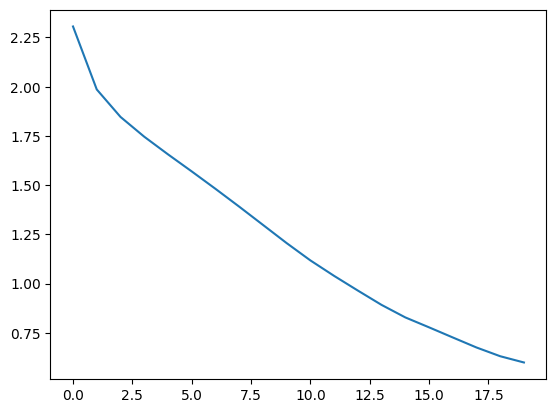

In [5]:
class CustomCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    model_name = f"/kaggle/working/{lora_name}_{lora_rank}_epoch{epoch+1}.lora.h5"
    gemma_lm.backbone.save_lora_weights(model_name)

    # Evaluate
    text_gen("""Ushbu matnni xulosala: \n
Ma’lum qilinishicha, ijtimoy tarmoqlarda kulvor ilonni tiriklay yegan fuqaro haqida video tarqalgandi. Jizzax viloyati Ekologiya boshqarmasi Zomin tumani bo‘limi va IIB xodimlari hamkorligida bu borada o‘rganish ishlari olib borildi va holat fuqaro Q.H. tomonidan sodir etilgani aniqlandi.
Fuqaro bu harakati bilan “Hayvonot dunyosini muhofaza qilish va undan foydalanish to‘g‘risida”gi qonunning 4, 30, 51, 53-moddalari talablarini buzgan.
Davlat inspektorlari tomonidan unga nisbatan Ma’muriy javobgarlik to‘g‘risidagi kodeksning 90-moddasi (ov qilish va baliq ovlash qoidalarini, shuningdek hayvonot dunyosidan foydalanishning boshqa turlarini amalga oshirish qoidalarini buzish) 1-qismi bilan BHMning 20 baravari (7,5 million so‘m) miqdorida jarima qo‘llanildi.""")

history = gemma_lm.fit(train, epochs=train_epoch, batch_size=1, callbacks=[CustomCallback()])

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()

This section details the process of loading the saved LoRA weights into the base Gemma 2 model and testing its performance using a custom prompt. It also includes visualizing the training loss over epochs to evaluate the model's improvement during fine-tuning.

<start_of_turn>user
Ushbu matnni xulosala: 

2025-yilning 3-yanvar kuni JIB Toshkent shahar sudi apellyatsiya instansiyasida G‘ayrat Do‘stov ishini ko‘rib chiqdi. Garchi birinchi instansiya sudi tomonidan 15 sutkaga qamalgan kirakashning hibs muddati 8 sutkaga qisqartirilgan va u sud zalidan ozod qilingan bo‘lsa-da, apellyatsiya sudida aniqlangan qator qonun buzilishi holatlariga huquqiy baho berilmadi.
Nega mahbus poytaxt IIBB yerto‘lasida saqlangan?
Amaldagi tartibga ko‘ra, ma’muriy qamoq jazosi tayinlanganlar Toshkent shahar IIBB ma’muriy qamoqqa olingan shaxslarni qabul qilish va saqlash uchun mo‘ljallangan maxsus qabulxonasida saqlanadi. Bu “Ma’muriy qamoqni o‘tash tartibi to‘g‘risida”gi qonunda belgilab qo‘yilgan.
Qonunda jinoyat ishlari bo‘yicha tuman (shahar) sudi sudyasining qarori ma’muriy qamoqni o‘tash uchun asos bo‘lishi belgilangan. JIB Bektemir tuman sudining 2024-yil 26-dekabrdagi qarorida ham G‘ayrat Do‘stov 15 sutkalik ma’muriy qamoq jazosini maxsus qabulxonada o‘tash

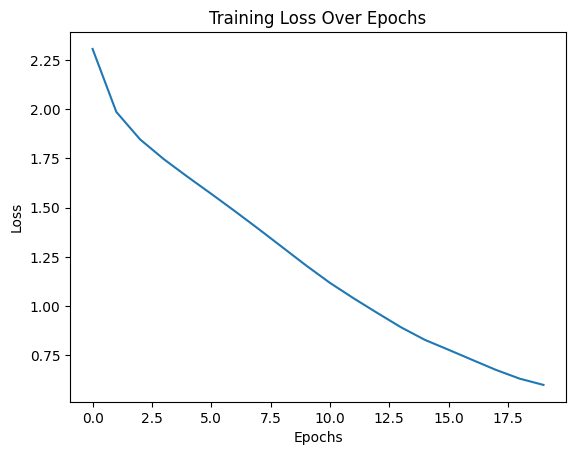

In [6]:
# Path to the saved LoRA weights
# saved_lora_weights = f"/kaggle/working/{lora_name}_{lora_rank}_epoch{train_epoch}.lora.h5"
saved_lora_weights = f"/kaggle/working/{lora_name}_{lora_rank}_epoch20.lora.h5"

# Load the LoRA weights into the base model
gemma_lm.backbone.load_lora_weights(saved_lora_weights)

# Test the fine-tuned model with a prompt

test_prompt = (
  "<start_of_turn>user\n"
  "Ushbu matnni xulosala: \n\n"
  """2025-yilning 3-yanvar kuni JIB Toshkent shahar sudi apellyatsiya instansiyasida G‘ayrat Do‘stov ishini ko‘rib chiqdi. Garchi birinchi instansiya sudi tomonidan 15 sutkaga qamalgan kirakashning hibs muddati 8 sutkaga qisqartirilgan va u sud zalidan ozod qilingan bo‘lsa-da, apellyatsiya sudida aniqlangan qator qonun buzilishi holatlariga huquqiy baho berilmadi.
Nega mahbus poytaxt IIBB yerto‘lasida saqlangan?
Amaldagi tartibga ko‘ra, ma’muriy qamoq jazosi tayinlanganlar Toshkent shahar IIBB ma’muriy qamoqqa olingan shaxslarni qabul qilish va saqlash uchun mo‘ljallangan maxsus qabulxonasida saqlanadi. Bu “Ma’muriy qamoqni o‘tash tartibi to‘g‘risida”gi qonunda belgilab qo‘yilgan.
Qonunda jinoyat ishlari bo‘yicha tuman (shahar) sudi sudyasining qarori ma’muriy qamoqni o‘tash uchun asos bo‘lishi belgilangan. JIB Bektemir tuman sudining 2024-yil 26-dekabrdagi qarorida ham G‘ayrat Do‘stov 15 sutkalik ma’muriy qamoq jazosini maxsus qabulxonada o‘tashi va buning uchun ketadigan xarajatlar fuqaroning hisobidan qoplanishi qayd etilgan.\n"""
  "<end_of_turn>\n"
  "<start_of_turn>model\n"
)


output = gemma_lm.generate(test_prompt, max_length=500)
print(output)

import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()


This section explains how to package the fine-tuned LoRA weights into a zip file for convenient sharing or deployment. It also provides a direct link to download the zipped weights for further use.

In [7]:
!zip -r lora_weights.zip /kaggle/working/
from IPython.display import FileLink
FileLink("lora_weights.zip")


  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/uzbek_gemma_5_4_epoch9.lora.h5

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


 (deflated 9%)
  adding: kaggle/working/uzbek_gemma_5_4_epoch12.lora.h5 (deflated 8%)
  adding: kaggle/working/__notebook__.ipynb (deflated 91%)
  adding: kaggle/working/uzbek_gemma_5_4_epoch2.lora.h5 (deflated 9%)
  adding: kaggle/working/uzbek_gemma_5_4_epoch14.lora.h5 (deflated 8%)
  adding: kaggle/working/uzbek_gemma_5_4_epoch5.lora.h5 (deflated 9%)
  adding: kaggle/working/uzbek_gemma_5_4_epoch10.lora.h5 (deflated 9%)
  adding: kaggle/working/uzbek_gemma_5_4_epoch16.lora.h5 (deflated 8%)
  adding: kaggle/working/uzbek_gemma_5_4_epoch3.lora.h5 (deflated 9%)
  adding: kaggle/working/uzbek_gemma_5_4_epoch8.lora.h5 (deflated 9%)
  adding: kaggle/working/uzbek_gemma_5_4_epoch18.lora.h5 (deflated 8%)
  adding: kaggle/working/uzbek_gemma_5_4_epoch17.lora.h5 (deflated 8%)
  adding: kaggle/working/uzbek_gemma_5_4_epoch1.lora.h5 (deflated 9%)
  adding: kaggle/working/uzbek_gemma_5_4_epoch6.lora.h5 (deflated 9%)
  adding: kaggle/working/uzbek_gemma_5_4_epoch19.lora.h5 (deflated 8%)
  adding:

/kaggle/working/lora_weights.zip